# UN Data Analysis Project

#### Analysis on UN data comparing GDP per capita and internet usage

1-4) Import the required packages with their customary aliases as follows:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Use the %matplotlib inline command so that your plots show in the notebook without having to call plt.show() every time.

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Formatting

In [2]:
%matplotlib inline

5) Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first 6 rows.

### Load Data

In [3]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv")
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN


6) Repeat for the internet use dataset. Call this DataFrame internet_df. Take a look at the first six rows.

In [4]:
col_names = ["Country or Area", "Year", "Value", "Value Footnotes"]
internet_df = pd.read_csv("../data/internet_use.csv", names=col_names)
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Country or Area,Year,Value,Value Footnotes
1,Afghanistan,2014,6.39,NaN
2,Afghanistan,2013,5.9,NaN
3,Afghanistan,2012,5.45454545454545,NaN
4,Afghanistan,2011,5,NaN
5,Afghanistan,2010,4,NaN


7) Look at the shape of each dataframe - how many rows, how many columns.

In [5]:
print(gdp_df.shape)
internet_df.shape

(6731, 4)


(4677, 4)

* The GDP dataframe has 6731 rows and 4 columns. The internet dataframe has 4677 rows and 4 columns.

8) Take a look at the data types for the columns in each table.



In [6]:
print(gdp_df.dtypes)
internet_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object


Country or Area    object
Year               object
Value              object
Value Footnotes    object
dtype: object

9) Take a look at the last 10 rows of each dataset in turn.



In [7]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN
6729,footnoteSeqID,Footnote,NaN,NaN
6730,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [8]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4667,171,Internet Dial-up customers.,NaN,NaN
4668,172,Population age 16+ using the Internet in the l...,NaN,NaN
4669,173,Population age 16+ using internet in the last ...,NaN,NaN
4670,174,"U.S. Census Bureau, Table 2. Reported Internet...",NaN,NaN
4671,175,Includes individuals 3 years and older,NaN,NaN
4672,176,NTIA/CPS survey.,NaN,NaN
4673,177,"Pew Internet Project, Internet",Broadband and cell phone statistics,” January 5
4674,178,Estimated based on Survey's results. Populatio...,NaN,NaN
4675,179,Preliminary. Country estimate.,NaN,NaN
4676,180,The methodology used to estimated the figure f...,NaN,NaN


In [9]:
gdp_df = gdp_df.drop(gdp_df.index[-2:])
internet_df = internet_df.drop(internet_df.index[-181:])

10) Drop the 'value footnotes' data (column) from both datasets. Check that this worked as expected.

In [11]:
del gdp_df['Value Footnotes']
del internet_df['Value Footnotes']

In [12]:
print(gdp_df.head())
internet_df.head()

  Country or Area  Year        Value
0     Afghanistan  2018  1734.723214
1     Afghanistan  2017  1758.465636
2     Afghanistan  2016  1757.023490
3     Afghanistan  2015  1766.593077
4     Afghanistan  2014  1795.735834


,Country or Area,Year,Value
0,Country or Area,Year,Value
1,Afghanistan,2014,6.39
2,Afghanistan,2013,5.9
3,Afghanistan,2012,5.45454545454545
4,Afghanistan,2011,5


11) Change the columns for the GDP Per Capita data frame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [13]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.head()
gdp_df.tail()

,Country,Year,GDP_Per_Capita
6724,Zimbabwe,1994,2768.309953
6725,Zimbabwe,1993,2572.870395
6726,Zimbabwe,1992,2591.007534
6727,Zimbabwe,1991,2906.272849
6728,Zimbabwe,1990,2819.549467


12) Change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [14]:
internet_df.columns = ['Country','Year','Internet_Users_Pct']
internet_df = internet_df.drop(internet_df.index[0])
internet_df.head()

,Country,Year,Internet_Users_Pct
1,Afghanistan,2014,6.39
2,Afghanistan,2013,5.9
3,Afghanistan,2012,5.45454545454545
4,Afghanistan,2011,5
5,Afghanistan,2010,4


13) Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

In [15]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on = ['Country', 'Year'], how = 'outer')

14) Look at the first five rows of your new data frame to confirm it merged correctly.



In [16]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.39


15) Look at the last five rows to make sure the data is clean and as expected.



In [17]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7700,Virgin Islands (U.S.),1997,NaN,6.94836898618664
7701,Virgin Islands (U.S.),1996,NaN,4.64718566436166
7702,Virgin Islands (U.S.),1995,NaN,2.80195763440057
7703,Virgin Islands (U.S.),1994,NaN,0.940645282663907
7704,Virgin Islands (U.S.),1990,NaN,0


16) Subset the combined data frame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [54]:
gdp_and_internet_use['Year'] = pd.to_numeric(gdp_and_internet_use['Year'], errors='coerce')
gdp_and_internet_use['Year'] = gdp_and_internet_use['Year'].replace(np.nan, 0, regex=True)
gdp_and_internet_use['Year'] = gdp_and_internet_use['Year'].astype(int)
gdp_and_internet_use['GDP_Per_Capita'] = pd.to_numeric(gdp_and_internet_use['GDP_Per_Capita'], errors='coerce')
gdp_and_internet_use['GDP_Per_Capita'] = gdp_and_internet_use['GDP_Per_Capita'].round(2)
gdp_and_internet_use['Internet_Users_Pct'] = pd.to_numeric(gdp_and_internet_use['Internet_Users_Pct'], errors='coerce')
gdp_and_internet_use['Internet_Users_Pct'] = gdp_and_internet_use['Internet_Users_Pct'].round(2)
print(gdp_and_internet_use.loc[gdp_and_internet_use['Year'].isin([2004, 2009, 2014])])
gdp_int_2004_2009_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'].isin([2004, 2009, 2014])]

                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
4               Afghanistan  2014         1795.74                6.39
9               Afghanistan  2009         1502.35                3.55
14              Afghanistan  2004         1025.21                0.11
21                  Albania  2014        10700.99               60.10
26                  Albania  2009         9525.38               41.20
...                     ...   ...             ...                 ...
7668               Viet Nam  2009             NaN               26.55
7673               Viet Nam  2004             NaN                7.64
7683  Virgin Islands (U.S.)  2014             NaN               50.07
7688  Virgin Islands (U.S.)  2009             NaN               27.40
7693  Virgin Islands (U.S.)  2004             NaN               27.38

[835 rows x 4 columns]


17) Create three new data frames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [21]:
gdp_int_2004 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2004]
gdp_int_2009 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2009]
gdp_int_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014]

18) Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab for auto-complete options).

In [22]:
gdp_int_2014[gdp_int_2014['Internet_Users_Pct']==gdp_int_2014['Internet_Users_Pct'].max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.89,98.16


* Iceland had the highest percentage of internet users in 2014 at 98.16%.

19) Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [23]:
gdp_int_2014[gdp_int_2014['Internet_Users_Pct']==gdp_int_2014['Internet_Users_Pct'].min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6940,Dem. People's Rep. of Korea,2014,NaN,0.0


* North Korea had the lowest percentage of internet users in 2014 at 0%.

20) Repeat for 2004 and 2009.



In [24]:
print(gdp_int_2004[gdp_int_2004['Internet_Users_Pct']==gdp_int_2004['Internet_Users_Pct'].max()])
print(gdp_int_2004[gdp_int_2004['Internet_Users_Pct']==gdp_int_2004['Internet_Users_Pct'].min()])
print(gdp_int_2009[gdp_int_2009['Internet_Users_Pct']==gdp_int_2009['Internet_Users_Pct'].max()])
print(gdp_int_2009[gdp_int_2009['Internet_Users_Pct']==gdp_int_2009['Internet_Users_Pct'].min()])

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
5852  Sweden  2004        40177.85               83.89
                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
6949  Dem. People's Rep. of Korea  2004             NaN                 0.0
      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2586  Iceland  2009        41505.08                93.0
                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
6944  Dem. People's Rep. of Korea  2009             NaN                 0.0


* Sweden had the highest percentage of internet users in 2004 at 83.89%.
* North Korea had the lowest percentage of internet users in 2004 at 0%.
* Iceland had the highest percentage of internet users in 2009 at 93.0%.
* North Korea had the lowest percentage of internet users in 2009 at 0%.

21) Which country had the highest gdp per capita in 2014? What was the gdp per capita?



In [25]:
gdp_int_2014[gdp_int_2014['GDP_Per_Capita']==gdp_int_2014['GDP_Per_Capita'].max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3639,"Macao SAR, China",2014,130439.11,NaN


* Macau had the highest GDP per capita in 2014 at $130,439.11.

22) Which country had the lowest gdp per capita in 2014? What was the gdp per capita?



In [26]:
gdp_int_2014[gdp_int_2014['GDP_Per_Capita']==gdp_int_2014['GDP_Per_Capita'].min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1014,Central African Republic,2014,672.68,NaN


* The Central African Republic had the lowest GDP per capita in 2014 at $672.68.

23) Create some scatterplots:
a. 2004 Percent Using the Internet vs GDP Per Capita
b. 2009 Percent Using the Internet vs GDP Per Capita
c. 2014 Percent Using the Internet vs GDP Per Capita

Text(0.5, 1.0, '2004 Percent Using the Internet vs. GDP Per Capita')

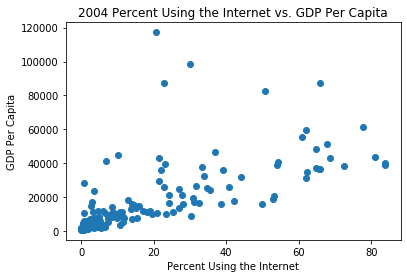

In [42]:
scatter2004 = plt.scatter(gdp_int_2004.Internet_Users_Pct, gdp_int_2004.GDP_Per_Capita)
plt.xlabel('Percent Using the Internet')
plt.ylabel('GDP Per Capita')
plt.title('2004 Percent Using the Internet vs. GDP Per Capita')

Text(0.5, 1.0, '2009 Percent Using the Internet vs. GDP Per Capita')

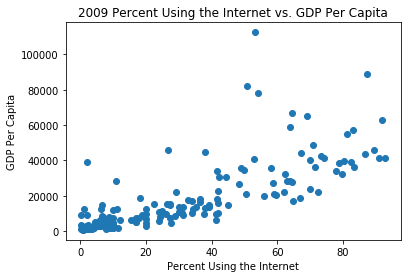

In [39]:
scatter2009 = plt.scatter(gdp_int_2009.Internet_Users_Pct, gdp_int_2009.GDP_Per_Capita)
plt.xlabel('Percent Using the Internet')
plt.ylabel('GDP Per Capita')
plt.title('2009 Percent Using the Internet vs. GDP Per Capita')

Text(0.5, 1.0, '2014 Percent Using the Internet vs. GDP Per Capita')

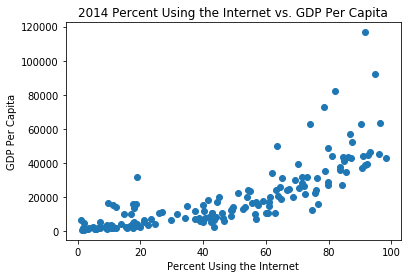

In [40]:
scatter2014 = plt.scatter(gdp_int_2014.Internet_Users_Pct, gdp_int_2014.GDP_Per_Capita)
plt.xlabel('Percent Using the Internet')
plt.ylabel('GDP Per Capita')
plt.title('2014 Percent Using the Internet vs. GDP Per Capita')

24) Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

* The greatest difference across the years appears to be in the countries with sub-20000 GDP per capita. In 2004, those countries were concentrated at less than 20% Internet users, but by 2014, those countries were spread to a much greater degree. Less dramatically, where there were a few countries with higher than 40000 GDP per capita and lower than 60% internet users in 2004, none remained in 2014. The plots appear to correlate positively, although the correlation appears to be weakening.

25) Look at the distribution of gdp per capita values for 2014. Is it unimodal?



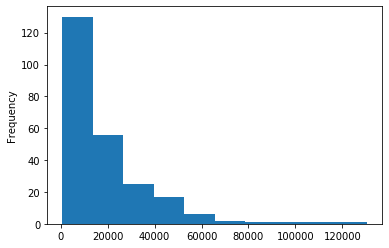

In [45]:
gdp_int_2014.GDP_Per_Capita.plot.hist()

* GDP per capita is unimodal in 2014.

26) Look at the distribution of Internet Use for 2014. Is it unimodal?



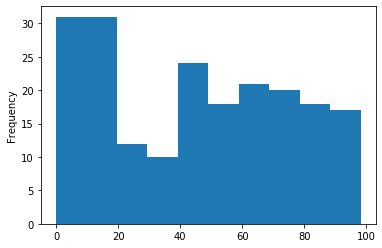

In [46]:
gdp_int_2014.Internet_Users_Pct.plot.hist()

* The percent using the internet is not unimodal in 2014.

27) What are the top 5 countries in terms of internet use in 2014?



In [47]:
gdp_int_2014.nlargest(5,'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.89,98.16
6772,Bermuda,2014,NaN,96.80
4530,Norway,2014,63328.26,96.30
1404,Denmark,2014,45057.08,95.99
6732,Andorra,2014,NaN,95.90


28) Create a data frame called top_5_internet from the combined data frame that has all three years for these 5 countries. You should have 15 rows. Check that this is true.

In [58]:
top_5_internet = gdp_int_2004_2009_2014.loc[gdp_int_2004_2009_2014['Country'].isin(['Iceland','Bermuda','Norway','Denmark','Andorra'])]
top_5_internet.shape

(15, 4)

29) Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014? Is there a plotting issue with Bermuda? Can you fix it?



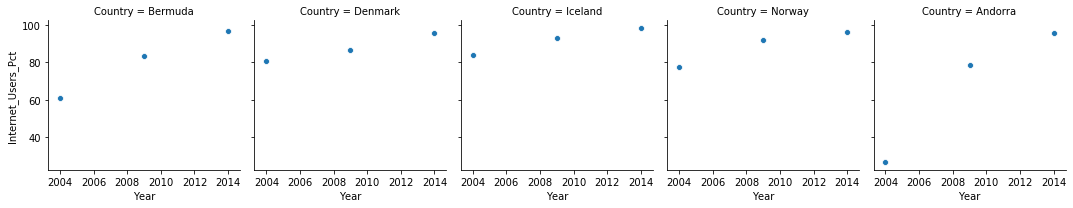

In [59]:
topintg = sns.FacetGrid(top_5_internet, col="Country")
topintg.map(sns.scatterplot, "Year", "Internet_Users_Pct")

* Andorra has the greatest growth in percentage of internet users between 2004 and 2014. I don't notice anything wrong with Bermuda's plot? I did some cleaning to try to make sure the join worked, so maybe I took care of it preemptively?

30) Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

In [65]:
gdp_int_2014.nsmallest(5,'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6940,Dem. People's Rep. of Korea,2014,NaN,0.00
6999,Eritrea,2014,NaN,0.99
6044,Timor-Leste,2014,6466.74,1.14
794,Burundi,2014,768.47,1.38
7521,Somalia,2014,NaN,1.63


In [68]:
bottom_5_internet = gdp_int_2004_2009_2014.loc[gdp_int_2004_2009_2014['Country'].isin(["Dem. People's Rep. of Korea",'Eritrea','Timor-Leste','Burundi','Somalia'])]
bottom_5_internet.shape

(15, 4)

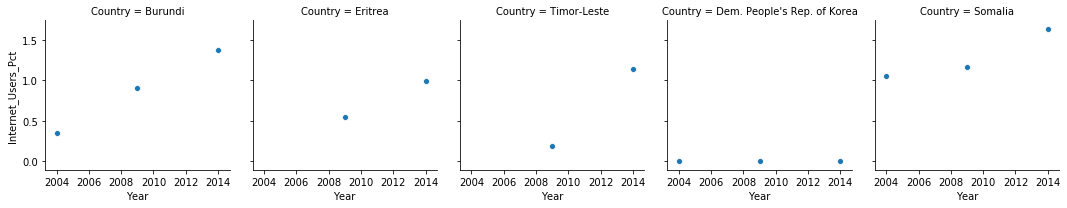

In [63]:
bottomintg = sns.FacetGrid(bottom_5_internet, col="Country")
bottomintg.map(sns.scatterplot, "Year", "Internet_Users_Pct")

North Korea has the consistently lowest internet usage at 0%.

31) Find the top 5 countries for 2014 in terms of GDP per capita; create a dataframe to look at 10-year trends in gdp per capita for those 5 countries. Use a seaborn facet grid for this.

In [69]:
gdp_int_2014.nlargest(5,'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3639,"Macao SAR, China",2014,130439.11,NaN
5003,Qatar,2014,116693.51,91.49
3610,Luxembourg,2014,92349.19,94.67
5316,Singapore,2014,81965.36,82.00
707,Brunei,2014,76448.59,NaN


In [79]:
top_5_gdp = gdp_int_2004_2009_2014.loc[gdp_int_2004_2009_2014['Country'].isin(['Macao SAR, China','Qatar','Luxembourg','Singapore','Brunei'])]
top_5_gdp.shape

(15, 4)

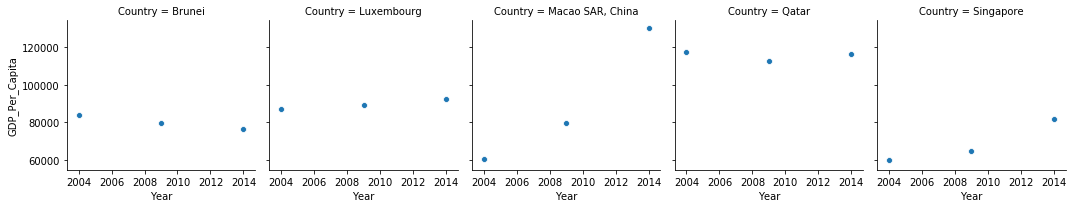

In [83]:
topgdpg = sns.FacetGrid(top_5_gdp, col="Country")
topgdpg.map(sns.scatterplot, "Year", "GDP_Per_Capita")

32) Repeat this one more time to look at 10-year trend for the bottom 5 countries for 2014 in terms of GDP per capita.

In [77]:
gdp_int_2014.nsmallest(5,'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1014,Central African Republic,2014,672.68,NaN
794,Burundi,2014,768.47,1.38
1375,Dem. Rep. Congo,2014,784.87,NaN
4414,Niger,2014,900.14,1.95
3697,Malawi,2014,1142.53,5.83


In [80]:
bottom_5_gdp = gdp_int_2004_2009_2014.loc[gdp_int_2004_2009_2014['Country'].isin(['Central African Republic','Burundi','Dem. Rep. Congo','Niger','Malawi'])]
bottom_5_gdp.shape

(15, 4)

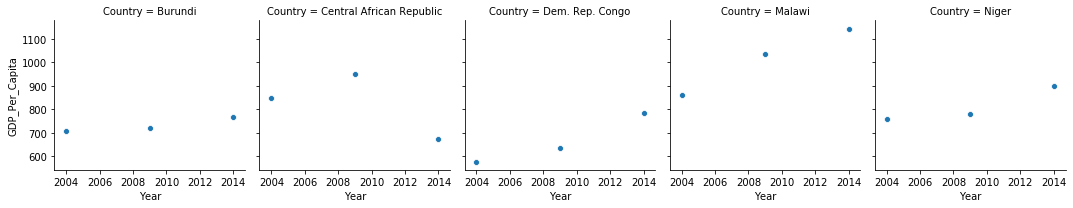

In [84]:
bottomgdpg = sns.FacetGrid(bottom_5_gdp, col="Country")
bottomgdpg.map(sns.scatterplot, "Year", "GDP_Per_Capita")

33) Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

* North Korean internet usage: North Korean access to the internet is generally forbidden, with a majority of citizens only being allowed access to an intranet. This is an important distinction, but I feel that the spirit of the metric would align with giving the intranet usage for North Korea, if available.
* Macau increase in GDP: Macau's economy is heavily reliant upon gambling, and the years that are being examined align with a loosening of restrictions on travel by China as well as a relaxation on gambling laws.
* Central African Republic decrease in GDP: Central African Republic's decrease in GDP aligns with militia conflict in the capital beginning in late 2012 which displaced about 20% of the country's population.

Bonus: Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.